In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

# Loading of data

In [3]:
data_dir = Path("data")

In [32]:
train = pd.read_csv(
    data_dir / "train.csv",
    usecols=["store_nbr", "family", "date", "sales", "onpromotion"],
    dtype={
        "store_nbr": "category",
        "family": "category",
        "sales": "float32",
        "onpromotion": "uint32",
        "id": "uint32"
    },
    # index_col="date",
    parse_dates=["date"],
    infer_datetime_format=True
)

In [33]:
train["date"] = train["date"].dt.to_period("D")  # Timestamp to period by day

In [34]:
train = train.set_index(["store_nbr", "family", "date"]).sort_index()

In [35]:
train.head()

sales  onpromotion
store_nbr family     date                          
1         AUTOMOTIVE 2013-01-01    0.0            0
                     2013-01-02    2.0            0
                     2013-01-03    3.0            0
                     2013-01-04    3.0            0
                     2013-01-05    5.0            0

In [37]:
train_family = train.groupby(["family", "date"]).mean().unstack("family")

In [39]:
train_family

sales                                                          \
family     AUTOMOTIVE BABY CARE    BEAUTY    BEVERAGES     BOOKS BREAD/BAKERY   
date                                                                            
2013-01-01   0.000000  0.000000  0.037037    15.000000  0.000000     3.344241   
2013-01-02   4.722222  0.000000  3.833333  1335.036987  0.000000   486.042938   
2013-01-03   2.981482  0.000000  2.314815   964.907410  0.000000   341.786682   
2013-01-04   3.129630  0.000000  2.462963  1003.092590  0.000000   309.666077   
2013-01-05   6.333333  0.000000  3.537037  1441.074097  0.000000   414.217804   
...               ...       ...       ...          ...       ...          ...   
2017-08-11   8.166667  0.129630  6.500000  3502.055664  0.000000   522.305298   
2017-08-12   7.462963  0.055556  6.833333  3376.259277  0.000000   507.473114   
2017-08-13   8.907408  0.166667  8.018518  3747.296387  0.018519   615.976990   
2017-08-14   5.407407  0.166667  6.240741  3237.629639  0.000000   518.564026   
2017-08-15   6.240741  0.148148  6.277778  3162.462891  0.000000   539.966553   

                                                             ... onpromotion  \
family     CELEBRATION     CLEANING       DAIRY        DELI  ...   MAGAZINES   
date                                                         ...               
2013-01-01    0.000000     3.444444    2.648148    1.316481  ...         0.0   
2013-01-02    0.000000  1382.018555  432.981476  291.750000  ...         0.0   
2013-01-03    0.000000  1035.055542  333.351837  206.897308  ...         0.0   
2013-01-04    0.000000   964.148132  336.074066  187.837204  ...         0.0   
2013-01-05    0.000000  1298.666626  427.444458  254.350830  ...         0.0   
...                ...          ...         ...         ...  ...         ...   
2017-08-11   16.111111  1031.148193  831.648132  345.934967  ...         0.0   
2017-08-12   15.722222  1072.870361  793.592590  290.553589  ...         0.0   
2017-08-13   10.074074  1143.648193  928.000000  325.801361  ...         0.0   
2017-08-14   11.000000  1019.111084  797.222229  271.532227  ...         0.0   
2017-08-15   11.055555  1082.851807  753.833313  276.582458  ...         0.0   

                                                                          \
family          MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                       
2013-01-01   0.000000      0.000000          0.0                0.000000   
2013-01-02   0.000000      0.000000          0.0                0.000000   
2013-01-03   0.000000      0.000000          0.0                0.000000   
2013-01-04   0.000000      0.000000          0.0                0.000000   
2013-01-05   0.000000      0.000000          0.0                0.000000   
...               ...           ...          ...                     ...   
2017-08-11  22.925926      9.000000          0.0                0.000000   
2017-08-12   0.000000      8.703704          0.0                0.018519   
2017-08-13   0.000000      9.240741          0.0                0.000000   
2017-08-14   0.000000      8.722222          0.0                0.000000   
2017-08-15   0.000000      8.814815          0.0                0.092593   

                                                                            \
family        POULTRY PREPARED FOODS    PRODUCE SCHOOL AND OFFICE SUPPLIES   
date                                                                         
2013-01-01   0.000000       0.000000   0.000000                   0.000000   
2013-01-02   0.000000       0.000000   0.000000                   0.000000   
2013-01-03   0.000000       0.000000   0.000000                   0.000000   
2013-01-04   0.000000       0.000000   0.000000                   0.000000   
2013-01-05   0.000000       0.000000   0.000000                   0.000000   
...               ...            ...        ...                        

In [38]:
train_family.drop("sales", axis=1).stack()

onpromotion
date       family                                 
2013-01-01 AUTOMOTIVE                     0.000000
           BABY CARE                      0.000000
           BEAUTY                         0.000000
           BEVERAGES                      0.000000
           BOOKS                          0.000000
...                                            ...
2017-08-15 POULTRY                        0.111111
           PREPARED FOODS                 0.166667
           PRODUCE                       58.685185
           SCHOOL AND OFFICE SUPPLIES     2.740741
           SEAFOOD                        0.000000

[55572 rows x 1 columns]

# Moving average

In [9]:
train_sales = train[["sales"]].groupby(["date", "store_nbr"]).sum()

In [10]:
train_sales

sales
date       store_nbr              
2013-01-01 1              0.000000
           10             0.000000
           11             0.000000
           12             0.000000
           13             0.000000
...                            ...
2017-08-15 54         12666.858398
           6          13849.208984
           7          18744.294922
           8          17723.876953
           9          18636.476562

[90936 rows x 1 columns]

In [11]:
window_size = 365

In [12]:
moving_average = train_sales.rolling(
    window=window_size,  # Annual moving average
    center=True,
    min_periods=window_size // 2
).mean()

In [13]:
train_sales.index.get_level_values("date")#.to_timestamp()

PeriodIndex(['2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
             '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
             '2013-01-01', '2013-01-01',
             ...
             '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
             '2017-08-15', '2017-08-15', '2017-08-15', '2017-08-15',
             '2017-08-15', '2017-08-15'],
            dtype='period[D]', name='date', length=90936)

In [14]:
moving_average

sales
date       store_nbr              
2013-01-01 1           5223.989867
           10          5195.598618
           11          5261.525640
           12          5243.922437
           13          5248.541228
...                            ...
2017-08-15 54         15280.627342
           6          15298.802333
           7          15329.949000
           8          15349.394178
           9          15366.139576

[90936 rows x 1 columns]

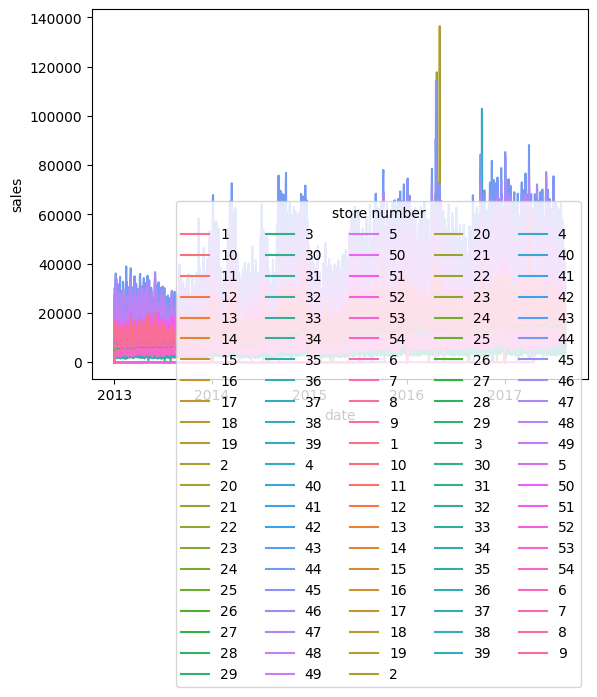

In [24]:
_, ax = plt.subplots()

ax = sns.lineplot(
    data=train_sales,
    x=train_sales.index.get_level_values("date").to_timestamp(),
    y="sales",
    hue=train_sales.index.get_level_values("store_nbr")
)
ax = sns.lineplot(
    ax=ax,
    data=moving_average,
    x=moving_average.index.get_level_values("date").to_timestamp(),
    y="sales",
    hue=moving_average.index.get_level_values("store_nbr")
)

ax.legend(title="store number", ncol=5, loc="upper right", bbox_to_anchor=(1.0,0.5))

<AxesSubplot:title={'center':'Sales moving average'}, xlabel='date,store_nbr', ylabel='sales'>

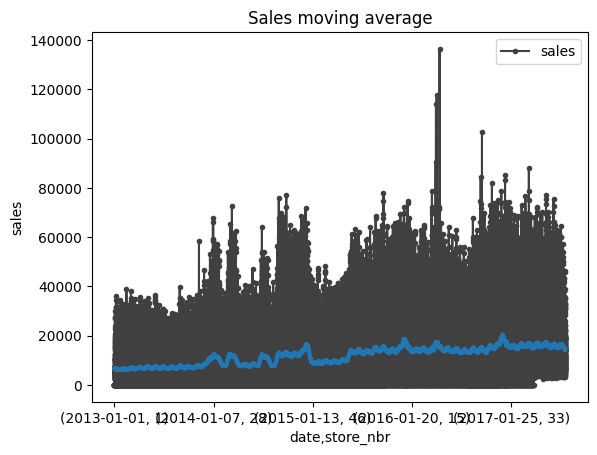

In [61]:
# ax = train_sales.plot(style=".-", color="0.25")
# ax.set_ylabel("sales")
# moving_average.plot(
#     ax=ax, linewidth=3, title="Sales moving average", legend=False
# )